<h1>F1 insights:</h1>

As an avid fan of F1, I decided to explore more about the sport through the dataset (https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020). 

This project is an Exploratory Data Analysis on the sport. I aim to gain insights on the evolution of F1 through the lens of development overtime and identifying the various factors that contribute to this.


In [52]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
file_list = ("circuits.csv", "constructor_results.csv", "constructor_standings.csv", "constructors.csv", "driver_standings.csv", "drivers.csv", "lap_times.csv", "pit_stops.csv", "qualifying.csv", "races.csv", "results.csv", "seasons.csv", "sprint_results.csv", "status.csv")

for file_name in file_list:
    file_path = "datasets/f1/" + file_name
    df = pd.read_csv(file_path)
    print(f"First few rows of {file_name}:")
    print(df.info())
    print("\n")

First few rows of circuits.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB
None


First few rows of constructor_results.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null 

In [17]:
circuits = pd.read_csv('datasets/f1/circuits.csv')
constructor_results = pd.read_csv('datasets/f1/constructor_results.csv')
constructor_standings = pd.read_csv('datasets/f1/constructor_standings.csv')
constructors = pd.read_csv('datasets/f1/constructors.csv')
driver_standings = pd.read_csv('datasets/f1/driver_standings.csv')
drivers = pd.read_csv('datasets/f1/drivers.csv')
lap_times = pd.read_csv('datasets/f1/lap_times.csv')
pit_stops = pd.read_csv('datasets/f1/pit_stops.csv')
qualifying = pd.read_csv('datasets/f1/qualifying.csv')
races = pd.read_csv('datasets/f1/races.csv')
results = pd.read_csv('datasets/f1/results.csv')
seasons = pd.read_csv('datasets/f1/seasons.csv')
sprint_results = pd.read_csv('datasets/f1/sprint_results.csv')
status = pd.read_csv('datasets/f1/status.csv')

In [55]:
c_s = pd.merge(constructor_results,constructor_standings, left_on='constructorId', right_on='constructorId', how='outer', suffixes=('_results','_standings'))
c_full = pd.merge(c_s, constructors, left_on='constructorId', right_on='constructorId', how='outer', suffixes=('_standings','_conctructors'))
c_r = pd.merge(c_full, races, left_on='raceId_results', right_on='raceId', how='outer', suffixes=('_constructors','_race'))
c_r.info()
c_r.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4498468 entries, 0 to 4498467
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   constructorResultsId    float64
 1   raceId_results          float64
 2   constructorId           float64
 3   points_results          float64
 4   status                  object 
 5   constructorStandingsId  float64
 6   raceId_standings        float64
 7   points_standings        float64
 8   position                float64
 9   positionText            object 
 10  wins                    float64
 11  constructorRef          object 
 12  name_constructors       object 
 13  nationality             object 
 14  url_constructors        object 
 15  raceId                  float64
 16  year                    float64
 17  round                   float64
 18  circuitId               float64
 19  name_race               object 
 20  date                    object 
 21  time                    object 

,constructorResultsId,raceId_results,constructorId,points_results,status,constructorStandingsId,raceId_standings,points_standings,position,positionText,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,18.0,1.0,14.0,\N,1.0,18.0,14.0,1.0,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1.0,18.0,1.0,14.0,\N,7.0,19.0,24.0,1.0,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1.0,18.0,1.0,14.0,\N,18.0,20.0,28.0,3.0,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1.0,18.0,1.0,14.0,\N,29.0,21.0,34.0,3.0,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1.0,18.0,1.0,14.0,\N,40.0,22.0,42.0,3.0,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


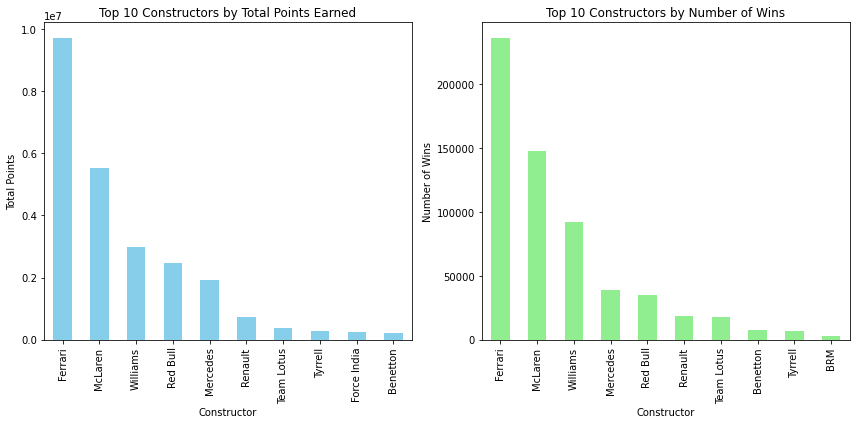

In [54]:
# 1. Constructor Performance Analysis
# Calculate total points earned by each constructor
constructor_points = c_r.groupby('name_constructors')['points_results'].sum().sort_values(ascending=False).head(10)

# Determine the number of wins for each constructor
constructor_wins = c_r[c_r['positionText'] == '1'].groupby('name_constructors').size().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
constructor_points.plot(kind='bar', color='skyblue')
plt.title('Top 10 Constructors by Total Points Earned')
plt.xlabel('Constructor')
plt.ylabel('Total Points')

plt.subplot(1, 2, 2)
constructor_wins.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Constructors by Number of Wins')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')

plt.tight_layout()
plt.show()